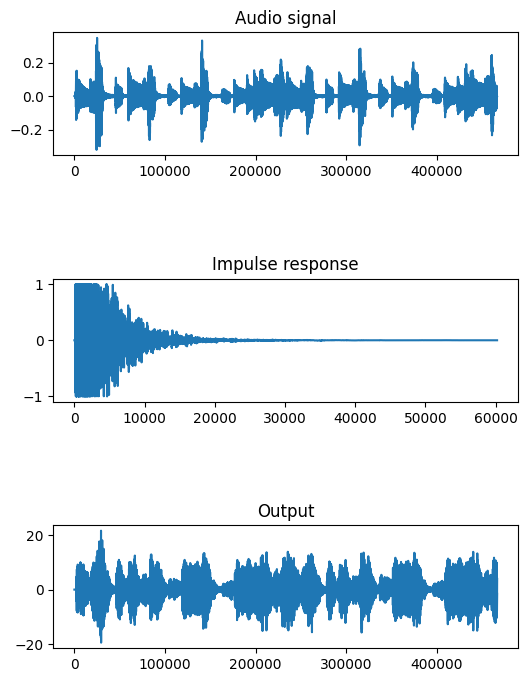

In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import tkinter as tk
from tkinter import filedialog
from tkinter import font

# Define the signal processing function
def process_signal(input_file, ir_file, wet_level):
    # Load the input and impulse response files
    audio, sr = librosa.load(input_file, sr=None)
    ir, sr = librosa.load(ir_file, sr=None, mono=True)
    
    # Normalize the impulse response to have magnitude 1
    ir = ir / max(abs(ir))
    
    # Apply the convolution to get the reverb signal
    reverb = np.convolve(audio, ir, mode='full')[:len(audio)]
    
    # Apply the wet/dry mix to get the final output signal
    dry = 1 - wet_level
    output = wet_level * reverb + dry * audio
    
    # Display the output audio signal in the GUI
    ipd.display(ipd.Audio(audio,rate=sr))
    ipd.display(ipd.Audio(output, rate=sr))
    fig,axis=plt.subplots(3, figsize=(6, 8),  gridspec_kw={'height_ratios': [1, 1, 1]})
    axis[0].plot(audio);
    axis[0].set_title("Audio signal")
  
    
    axis[1].plot(ir)
    axis[1].set_title("Impulse response")
    
    axis[2].plot(output)
    axis[2].set_title("Output")
    fig.subplots_adjust(hspace=1)
    
    plt.show()

# Create the GUI
root = tk.Tk()
root.title('Reverb Processor(DSP_Project)')
root.configure(bg='light green')
my_font = font.Font(family='Helvetica', size=12, weight='bold')

# Create a function to allow the user to select an audio file
def choose_audio_file():
    audio_file = filedialog.askopenfilename(filetypes=[('Audio Files', '*.wav;*.mp3')])
    input_entry.delete(0, tk.END)
    input_entry.insert(0, audio_file)

# Create a function to allow the user to select an impulse response file
def choose_ir_file():
    ir_file = filedialog.askopenfilename(filetypes=[('Audio Files', '*.wav;*.mp3')])
    ir_entry.delete(0, tk.END)
    ir_entry.insert(0, ir_file)

# Create input widgets for the input file, impulse response file, and wet/dry mix level
input_label = tk.Label(root, text='Input File:', font=my_font)
input_entry = tk.Entry(root)
input_button = tk.Button(root, text='Choose File', command=choose_audio_file, font=my_font)
ir_label = tk.Label(root, text='Impulse Response File:', font=my_font)
ir_entry = tk.Entry(root)
ir_button = tk.Button(root, text='Choose File', command=choose_ir_file, font=my_font)
wet_label = tk.Label(root, text='Wet/Dry Mix Level:', font=my_font)
wet_scale = tk.Scale(root, from_=0, to=1, resolution=0.01, orient=tk.HORIZONTAL)

# Create a button to trigger the signal processing function
process_button = tk.Button(root, text='Process Signal', command=lambda: process_signal(input_entry.get(), ir_entry.get(), wet_scale.get()))

# Lay out the widgets in the GUI
input_label.grid(row=0, column=0)
input_entry.grid(row=0, column=1)
input_button.grid(row=0, column=2)
ir_label.grid(row=1, column=0)
ir_entry.grid(row=1, column=1)
ir_button.grid(row=1, column=2)
wet_label.grid(row=2, column=0)
wet_scale.grid(row=2, column=1)
process_button.grid(row=3, column=0, columnspan=3)

# Start the GUI event loop
root.mainloop()
